In [10]:
import csv
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
import scipy
import json
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [11]:
action_id =["att","mvc","mva","mvt","congrats","encour","rul"]

with open('sup_event.csv') as f:
    l=[]
    r = csv.reader(f, delimiter=";")
    for row in r:
        l.append(row)
    sup_event=[]
    for r_num,row in enumerate(l):
        for i in range(25):
            for j in range(4):
                c=[row[2*(4*i+j)],row[2*(4*i+j)+1]]
                if r_num==0:
                    if j==0:
                        sup_event.append([[c]])
                    else:
                        sup_event[i].append([c])
                else:
                    if c != ["",""]:
                        sup_event[i][j].append(c)
    
with open('aut_event.csv') as f:
    l=[]
    r = csv.reader(f, delimiter=";")
    for row in r:
        l.append(row)
    aut_event=[]
    count=0
    for r_num,row in enumerate(l):
        for i in range(25):
            for j in range(4):
                c=[row[2*(4*i+j)],row[2*(4*i+j)+1]]
                if c[1]=="congrats":
                    count+=1
                if r_num==0:
                    if j==0:
                        aut_event.append([[c]])
                    else:
                        aut_event[i].append([c])
                else:
                    if c != ["",""]:
                        aut_event[i][j].append(c)

In [12]:
sup_actions=[]
for child in sup_event:
    actions=np.zeros(len(action_id))
    for interaction in child:
        for event in interaction:
            try:
                actions[action_id.index(event[1].split("_")[0])]+=1
            except:
                pass
    sup_actions.append(actions)
aut_actions=[]
for child in aut_event:
    actions=np.zeros(len(action_id))
    for interaction in child:
        for event in interaction:
            try:
                actions[action_id.index(event[1].split("_")[0])]+=1
            except:
                pass
    aut_actions.append(actions)
sup_actions=np.transpose(sup_actions)
aut_actions=np.transpose(aut_actions)

In [13]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 17}
saving = True
def get_time_between(data, ev1, ev2):    
    t=0
    ts=[]
    for c in data:
        for r in c:
            t=None
            for event in r:
                if event[1].startswith(ev2) and t is not None:
                    ts.append(float(event[0])-float(t))    
                if event[1].startswith(ev1):
                    t=event[0]
    return ts
def plot_time(ev1,ev2):
    plt.rc('font', **font)
    f1, (ax1) = plt.subplots(1, 1, figsize=(5,4.6))
    f2, (ax2) = plt.subplots(1, 1, figsize=(5,4.4))
    t1=get_time_between(sup_event,ev1,ev2)
    t2=get_time_between(aut_event,ev1,ev2)
    m=max(max(t1),max(t2))
    sns.swarmplot(t1,ax=ax1,palette=["black"])
    sns.violinplot(t1,ax=ax1, palette=["#F7C544"])
    ax1.set_xlabel("Time since eating event for \n each congratulation action (s)", **font)
    ax1.xaxis.set_tick_params(labeltop="on")
    ax1.xaxis.set_label_position('top')
    ax1.xaxis.set_tick_params(labelbottom="off")
    ax1.set_xlim(-m/100.,1.1*m)
    ax1.set_ylim(-0.5,0.5)
    sns.swarmplot(t2,ax=ax2,palette=["black"])
    sns.violinplot(t2,ax=ax2, palette=["deepskyblue"])
    ax2.set_xlim(-m/100,1.1*m)
    ax2.set_ylim(-0.5,0.5)
    ax2.xaxis.set_tick_params(labeltop="on")
    ax2.xaxis.set_tick_params(labelbottom="off")
    plt.show()  
    
    if saving:
        f1.savefig("./compa_time_sup.pdf",bbox_inches="tight")
        f2.savefig("./compa_time_aut.pdf",bbox_inches="tight")

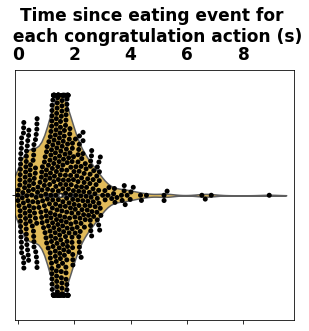

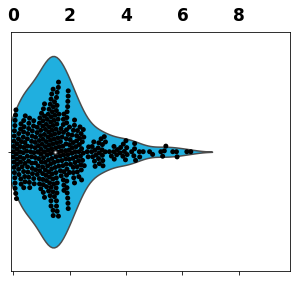

In [14]:
plot_time("animaleat","cong")

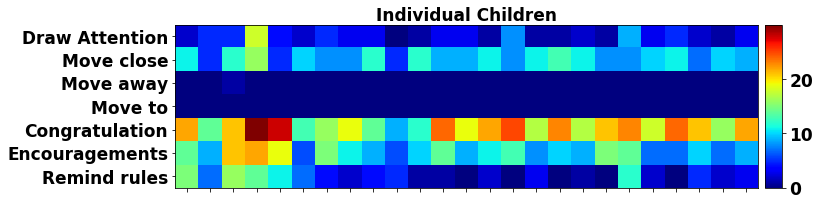

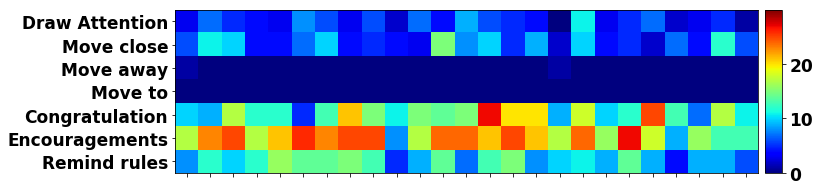

In [15]:
action_labels = ["Draw Attention", "Move close", "Move away","Move to", "Congratulation","Encouragements","Remind rules"]

def plot_action(actions,name,saving=True,first=False):
    if first:
        f, ax1 = plt.subplots(figsize=(15,3))
    else:
        f, ax1 = plt.subplots(figsize=(15,3))
    cax=ax1.matshow(actions, cmap='jet', vmin=0,vmax=30)
    plt.yticks(np.arange(len(action_labels)), action_labels)
    
    plt.gca().xaxis.tick_bottom()
    if first:
        plt.xlabel("Individual Children",**font)
        ax1.xaxis.set_label_position('top')
    plt.xticks(range(25), ["" for i in range(25)]) 
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("right", size="3%", pad=0.1)
    cbar=f.colorbar(cax, cax=cax1)
    cbar.set_ticks([0,10,20])
    cbar.ax.set_yticklabels([0, 10,20]) 
    plt.show()
    if saving:
        f.savefig(name+"_actions.pdf",bbox_inches="tight")
plot_action(sup_actions,"supervised",saving=True,first=True)
plot_action(aut_actions,"autonomous",saving=True,first=False)

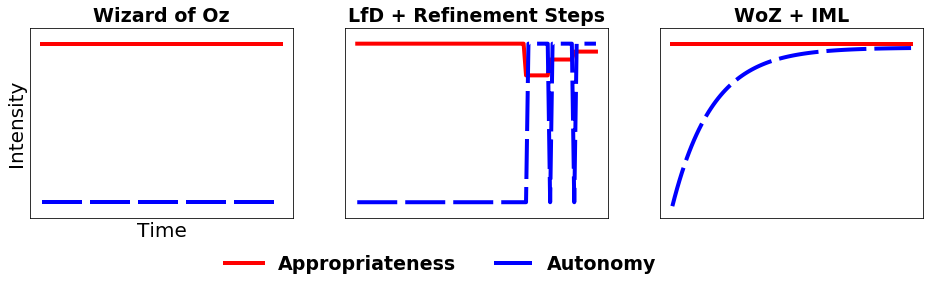

In [16]:
saving=True
weight='bold'
fontsize=19
x=np.arange(100)
lfd=np.zeros((len(x),2))
wz=np.zeros((len(x),2))
sp=np.zeros((len(x),2))
for i in x:
    wz[i][0]=1
    wz[i][1]=0.
    
    if i<len(x)*.7:
        lfd[i][0]=1
        lfd[i][1]=0
    elif i<len(x)*.8:
        lfd[i][0]=0.8
        lfd[i][1]=1
    elif i<len(x)*.9:
        lfd[i][0]=0.9
        lfd[i][1]=1
    else:
        lfd[i][0]=0.95
        lfd[i][1]=1

    sp[i][0]=1
    sp[i][1]=.975-np.exp(-i*6./len(x))
lfd[int(len(x)*.7)][1]=0
lfd[int(len(x)*.8)][1]=0
lfd[int(len(x)*.9)][1]=0

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.set_size_inches(16,3.5)
linewidth=4
dashes=[[10,2]]
color=['r','b']
ax1.plot(wz[:,0],color[0],linewidth=linewidth)
ax2.plot(lfd[:,0],color[0],linewidth=linewidth)
ax3.plot(sp[:,0],color[0],linewidth=linewidth)
ax1.plot(wz[:,1],color[1],linewidth=linewidth,dashes=dashes[0])
ax2.plot(lfd[:,1],color[1],linewidth=linewidth,dashes=dashes[0])
ax3.plot(sp[:,1],color[1],linewidth=linewidth,dashes=dashes[0])

ax1.set_title("Wizard of Oz",fontsize=fontsize, fontweight=weight)
ax2.set_title("LfD + Refinement Steps",fontsize=fontsize, fontweight=weight)
ax3.set_title("WoZ + IML",fontsize=fontsize, fontweight=weight)
#ax3.set_title("SPARC",fontsize=fontsize, fontweight=weight)
for ax in [ax1,ax2,ax3]:
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        left='off',         # ticks along the top edge are off
        right='off',         # ticks along the top edge are off
        labelbottom='off', # labels along the bottom edge are off
        labelleft='off') # labels along the bottom edge are off
plt.ylim(-.1,1.1)

legend_properties = {'weight':weight,"size":fontsize}
ax1.set_ylabel('Intensity', fontsize=fontsize+1)
ax1.set_xlabel('Time', fontsize=fontsize+1)

plt.legend(labels=["Appropriateness","Autonomy"], bbox_to_anchor=(.05,-0.1), prop=legend_properties,ncol=4,frameon=False)
#plt.savefig("concept.pdf",bbox_inches='tight')
if saving:
    plt.savefig("./concept.pdf",bbox_inches='tight')
plt.show()